In [1]:
#  Exercicis d'anàlisi de sentiment i textos.
#- Exercici 1: Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

#- Exercici 2: Treu les stopwords i realitza stemming al teu conjunt de dades (El stemming es un método para reducir todas las formas flexionadas de palabras a su «raíz» o «tallo» (stem, en inglés))

#- Exercici 3: Realitza sentiment analysis al teu conjunt de dades.


3


In [2]:
import nltk

text = "One of the things I appreciate most about this software is the ease of use and the ability to quickly and efficiently engaged users. Text Request gives us another quick, easy way to connect to our clients and gives them the ability to reach out to us any time of day. Their customer service is amazing.Very impressed with the quality of the product, particularly for the price."

##############################
# DIVIDIR EL TEXTO EN FRASES #
##############################
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['One of the things I appreciate most about this software is the ease of use and the ability to quickly and efficiently engaged users.', 'Text Request gives us another quick, easy way to connect to our clients and gives them the ability to reach out to us any time of day.', 'Their customer service is amazing.Very impressed with the quality of the product, particularly for the price.']


In [3]:
################################
# DIVIDIR EL TEXTO EN PALABRAS #
################################
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)



# - - > OTRA MANERA DE HACERLO: #
text.split()

['One', 'of', 'the', 'things', 'I', 'appreciate', 'most', 'about', 'this', 'software', 'is', 'the', 'ease', 'of', 'use', 'and', 'the', 'ability', 'to', 'quickly', 'and', 'efficiently', 'engaged', 'users', '.', 'Text', 'Request', 'gives', 'us', 'another', 'quick', ',', 'easy', 'way', 'to', 'connect', 'to', 'our', 'clients', 'and', 'gives', 'them', 'the', 'ability', 'to', 'reach', 'out', 'to', 'us', 'any', 'time', 'of', 'day', '.', 'Their', 'customer', 'service', 'is', 'amazing.Very', 'impressed', 'with', 'the', 'quality', 'of', 'the', 'product', ',', 'particularly', 'for', 'the', 'price', '.']


['One',
 'of',
 'the',
 'things',
 'I',
 'appreciate',
 'most',
 'about',
 'this',
 'software',
 'is',
 'the',
 'ease',
 'of',
 'use',
 'and',
 'the',
 'ability',
 'to',
 'quickly',
 'and',
 'efficiently',
 'engaged',
 'users.',
 'Text',
 'Request',
 'gives',
 'us',
 'another',
 'quick,',
 'easy',
 'way',
 'to',
 'connect',
 'to',
 'our',
 'clients',
 'and',
 'gives',
 'them',
 'the',
 'ability',
 'to',
 'reach',
 'out',
 'to',
 'us',
 'any',
 'time',
 'of',
 'day.',
 'Their',
 'customer',
 'service',
 'is',
 'amazing.Very',
 'impressed',
 'with',
 'the',
 'quality',
 'of',
 'the',
 'product,',
 'particularly',
 'for',
 'the',
 'price.']

In [4]:
###########################
# FRECUENCIA DE PALABRAS #
###########################
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 50 samples and 72 outcomes>


In [5]:
######################
# PALABRAS + USUALES #
######################
fdist.most_common(5)

[('the', 7), ('to', 5), ('of', 4), ('and', 3), ('.', 3)]

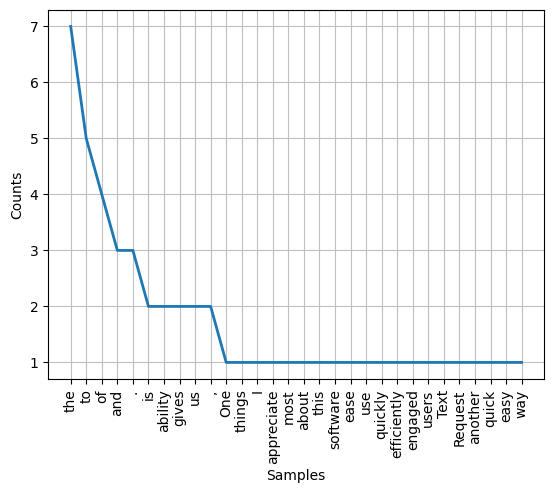

In [6]:
#######################################
# GRÁFICO DE DISTRIBUCIÓN DE PALABRAS #
#######################################

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [43]:
#####################################################
# OTRA MANERA DE ANALIZAR LA FRECUENCIA DE PALABRAS #
#####################################################

text2 = 'text = "One of the things I appreciate most about this software is the ease of use and the ability to quickly and efficiently engaged users. '

# La siguiente linea solo es para provar el +=   ---> añade el texto indicado al anterior
text2 += 'Text Request gives us another quick, easy way to connect to our clients and gives them the ability to reach out to us any time of day. Their customer service is amazing.Very impressed with the quality of the product, particularly for the price.'


listaPalabras = text.split()

frecuenciaPalab = []
for w in listaPalabras:
    frecuenciaPalab.append(listaPalabras.count(w))

print("Cadena\n" + text2 +"\n")
print("Lista\n" + str(listaPalabras) + "\n")
print("Frecuencias\n" + str(frecuenciaPalab) + "\n")
print("Pares\n" + str(list(zip(listaPalabras, frecuenciaPalab))))

Cadena
text = "One of the things I appreciate most about this software is the ease of use and the ability to quickly and efficiently engaged users. Text Request gives us another quick, easy way to connect to our clients and gives them the ability to reach out to us any time of day. Their customer service is amazing.Very impressed with the quality of the product, particularly for the price.

Lista
['One', 'of', 'the', 'things', 'I', 'appreciate', 'most', 'about', 'this', 'software', 'is', 'the', 'ease', 'of', 'use', 'and', 'the', 'ability', 'to', 'quickly', 'and', 'efficiently', 'engaged', 'users.', 'Text', 'Request', 'gives', 'us', 'another', 'quick,', 'easy', 'way', 'to', 'connect', 'to', 'our', 'clients', 'and', 'gives', 'them', 'the', 'ability', 'to', 'reach', 'out', 'to', 'us', 'any', 'time', 'of', 'day.', 'Their', 'customer', 'service', 'is', 'amazing.Very', 'impressed', 'with', 'the', 'quality', 'of', 'the', 'product,', 'particularly', 'for', 'the', 'price.']

Frecuencias
[1, 4, 

In [21]:
#################################################################################################
# CARGAMOS LA LIBRERIA CON LAS STOPWORDS (palabras que no aportan significado para el análisis) #
#################################################################################################
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)



### ----> No he sido capaz de cargar la libreria, así que cargaré las StopWords manualmente. 

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'D:\\Users\\Gestio/nltk_data'
    - 'D:\\Users\\Gestio\\anaconda3\\nltk_data'
    - 'D:\\Users\\Gestio\\anaconda3\\share\\nltk_data'
    - 'D:\\Users\\Gestio\\anaconda3\\lib\\nltk_data'
    - 'D:\\Users\\Gestio\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [22]:
english_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
                         'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
                         "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
                         'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
                         'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
                         'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
                         'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
                         'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
                         'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                         'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
                         'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
                         'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
                         'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
                         'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
                         "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
                         "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
                         'won', "won't", 'wouldn', "wouldn't"]

In [37]:
########################################
# ELIMINAMOS LAS STOPWORDS DE MI TEXTO #
########################################

filtered_sent=[]
for w in tokenized_word:
    if w not in english_stopwords:
        filtered_sent.append(w)
print("Tokenized Sentence:\n",tokenized_word, "\n")
print("Filterd Sentence:\n",filtered_sent)

Tokenized Sentence:
 ['One', 'of', 'the', 'things', 'I', 'appreciate', 'most', 'about', 'this', 'software', 'is', 'the', 'ease', 'of', 'use', 'and', 'the', 'ability', 'to', 'quickly', 'and', 'efficiently', 'engaged', 'users', '.', 'Text', 'Request', 'gives', 'us', 'another', 'quick', ',', 'easy', 'way', 'to', 'connect', 'to', 'our', 'clients', 'and', 'gives', 'them', 'the', 'ability', 'to', 'reach', 'out', 'to', 'us', 'any', 'time', 'of', 'day', '.', 'Their', 'customer', 'service', 'is', 'amazing.Very', 'impressed', 'with', 'the', 'quality', 'of', 'the', 'product', ',', 'particularly', 'for', 'the', 'price', '.'] 

Filterd Sentence:
 ['One', 'things', 'I', 'appreciate', 'software', 'ease', 'use', 'ability', 'quickly', 'efficiently', 'engaged', 'users', '.', 'Text', 'Request', 'gives', 'us', 'another', 'quick', ',', 'easy', 'way', 'connect', 'clients', 'gives', 'ability', 'reach', 'us', 'time', 'day', '.', 'Their', 'customer', 'service', 'amazing.Very', 'impressed', 'quality', 'product'

In [26]:
##############################################
# REDUCIR CADA PALABRA A SU RAIZ (STEAMING) #
##############################################

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

## - - - > Hay otro proceso parecido: LEMATIZACIÓN:  relaciona una palabra flexionada o derivada con su forma canónica o lema.P.ej.: niños, niña, niñitos, etc... losengloba en una única categoria (niño); ello es diferente a reducir las palabras a su raíz. 


Filtered Sentence: ['One', 'things', 'I', 'appreciate', 'software', 'ease', 'use', 'ability', 'quickly', 'efficiently', 'engaged', 'users', '.', 'Text', 'Request', 'gives', 'us', 'another', 'quick', ',', 'easy', 'way', 'connect', 'clients', 'gives', 'ability', 'reach', 'us', 'time', 'day', '.', 'Their', 'customer', 'service', 'amazing.Very', 'impressed', 'quality', 'product', ',', 'particularly', 'price', '.']
Stemmed Sentence: ['one', 'thing', 'i', 'appreci', 'softwar', 'eas', 'use', 'abil', 'quickli', 'effici', 'engag', 'user', '.', 'text', 'request', 'give', 'us', 'anoth', 'quick', ',', 'easi', 'way', 'connect', 'client', 'give', 'abil', 'reach', 'us', 'time', 'day', '.', 'their', 'custom', 'servic', 'amazing.veri', 'impress', 'qualiti', 'product', ',', 'particularli', 'price', '.']


In [47]:
###############################
# FEM L'ANÀLISI DE SENTIMENT # 
###############################
                                 # L'anàlisi de sentiment ens indica l'actitud o l'emoció de l'escriptor
                                 # El faré amb l'eina TEXTBLOB, que dóna 2 parámetres com a resultat d'aquest analisi: 
                                    # POLARITAT: [-1,1] donde 1 significa declaración positiva y -1 significa declaración negativa
                                    # SUBJECTIVITAT: [0,1] donde 0 significa texto objetivo y 1 significa texto subjetivo


from textblob import TextBlob
analisis = TextBlob(text)
print(analisis.sentiment)

Sentiment(polarity=0.461111111111111, subjectivity=0.6111111111111112)


In [63]:
text2= 'La La Land” which was released in 2017 and was directed by Damien Chazelle, is one of the most acclaimed films by the audience of this genre. The plot caught me completely from the beginning. This musical and romantic film is about the story of a young girl who wants to be an actress, and a boy with great musical gifts and how they fall in love. However, it is not just a love story. The film has a deep background because it tries to reflect on the importance of chasing the dreams and how it affects in a relationship'
analisis2 = TextBlob(text2)
print(analisis2.sentiment)

Sentiment(polarity=0.21666666666666667, subjectivity=0.3875)


In [ ]:
##  Crec que aquest últim anàlisi no és encertat: ens indica un valor propers a 0 quan s'hauria d'apropar a 1 (sentiment positiu)